# 1. 단어 빈도분석

#### ※ 트럼프 대통령 취임연설문 단어빈도 분석

In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer  # 어근추출
from nltk.tokenize import RegexpTokenizer  # 정규표현식을 사용하여 단어 토큰화를 제공
from nltk.corpus import stopwords  # 불용어 정의

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOJINSOO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
f = open("데이터/트럼프취임연설문.txt", 'r')
lines = f.readlines()[0]
f.close()

In [53]:
lines

" Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you. Today’s ceremony however, has very special meaning, because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC. And giving it back to you, the people. For too long, have

In [7]:
tokenizer = RegexpTokenizer('[\w]+')  # \w : 단어 영문자+숫자+_(밑줄) [0-9a-zA-Z_]

In [8]:
stop_words = stopwords.words('english')  # 불용어 정의
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
### 영단어 전처리 과정
words =lines.lower()  # 모든 단어를 소문자로 변환
tokens = tokenizer.tokenize(words)  # 단어 단위로 토큰화
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]  # 불영어 제거
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]  # 한 글자 제거

In [10]:
pd.Series(stopped_tokens2).value_counts().head(10)  # 리스트 안의 단어들을 pandas Series 형태로 변환 후 단어 빈도를 카운트

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
great        6
never        6
dtype: int64

#### - america, american, people 등 평소 강한 미국민을 표방하는 트럼프의 언행과 부합

#### ※ 문재인 대통령 취임연설문 단어빈도 분석

In [11]:
import pandas as pd
from konlpy.tag import Hannanum  # 한나눔 현태소 분석기 사용
hannanum = Hannanum()

In [54]:
f = open("데이터/문재인대통령취임연설문.txt", 'r')
lines = f.readlines()
f.close()

In [57]:
lines

['존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n',
 '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.\n',
 '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.\n',
 '존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.\n',
 '오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일 이날은 진정한 국민 통합이 시작된 날

In [14]:
temp = []

for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))  # 한나눔 현태소 분석기로 명사만 추출하여 적재

In [15]:
def flatten(l):
    flatList = []
    
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)

    return flatList

In [16]:
word_list = flatten(temp)

In [17]:
word_list = pd.Series([x for x in word_list if len(x)>1])  # 두 글자 이상인 단어들만 추출

In [18]:
word_list.value_counts().head(10)  # 단어별 출현 빈도

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
역사       6
나라       6
국민들      6
대통령의     5
세상       5
dtype: int64

#### ※ WordCloud

In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud
from collections import Counter

In [20]:
font_path = "NanumBarunGothic.ttf"  # 한글이 인식 가능한 폰트 설정

In [21]:
wordcloud = WordCloud(
font_path = font_path,
width = 800,
height = 800,
background_color = "white"
)

In [30]:
count = Counter(stopped_tokens2)
count

Counter({'chief': 1,
         'justice': 1,
         'roberts': 1,
         'president': 5,
         'carter': 1,
         'clinton': 1,
         'bush': 1,
         'obama': 3,
         'fellow': 1,
         'americans': 4,
         'people': 10,
         'world': 6,
         'thank': 4,
         'citizens': 4,
         'america': 20,
         'joined': 1,
         'great': 6,
         'national': 2,
         'effort': 1,
         'rebuild': 1,
         'country': 9,
         'restore': 1,
         'promise': 1,
         'together': 4,
         'determine': 1,
         'course': 1,
         'many': 5,
         'years': 2,
         'come': 1,
         'face': 2,
         'challenges': 1,
         'confront': 1,
         'hardships': 1,
         'get': 2,
         'job': 1,
         'done': 2,
         'every': 7,
         'four': 1,
         'gather': 1,
         'steps': 1,
         'carry': 1,
         'orderly': 1,
         'peaceful': 1,
         'transfer': 1,
         'power': 4,

In [31]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [32]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)"
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

array = wordcloud.to_array()

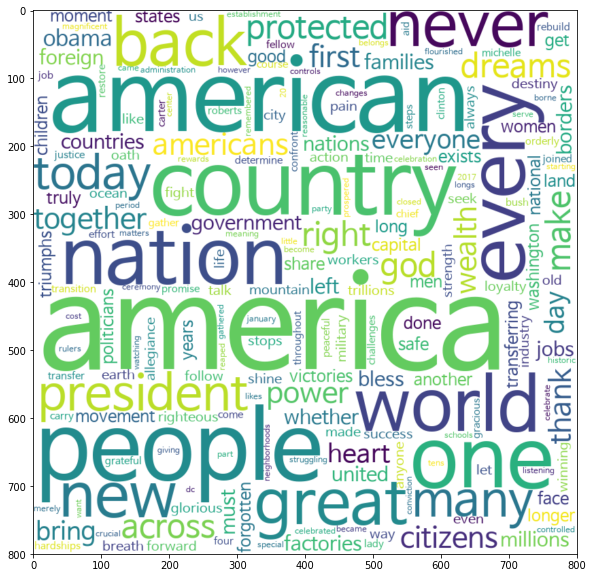

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")  # 보간법 = 쌍선형 보간법
plt.show()
fig.savefig('wordcloud.png')

In [34]:
count = Counter(word_list)

In [35]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [36]:
array = wordcloud.to_array()

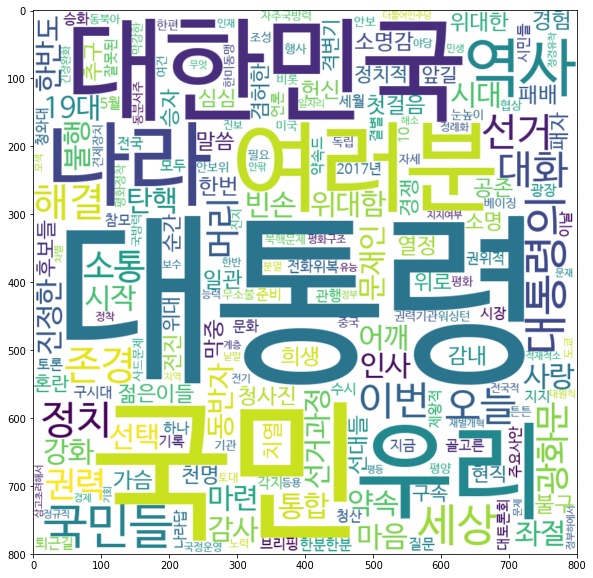

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

#### ※ 트럼프 대통령 형상 WordCloud

In [39]:
from PIL import Image  # 이미지 처리, openCV, pillow 등
import numpy as np

In [40]:
trump_mask = np.array(Image.open("D:\\취임연설문\\trump.PNG"))

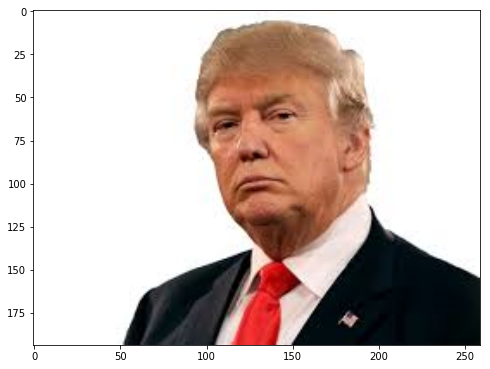

In [41]:
plt.figure(figsize=(8,8))
plt.imshow(trump_mask, interpolation="bilinear")
plt.show()

In [42]:
count = Counter(stopped_tokens2)

wc_trump = WordCloud(
font_path = font_path,
mask = trump_mask,
background_color = "white")

wc_trump = wc_trump.generate_from_frequencies(count)

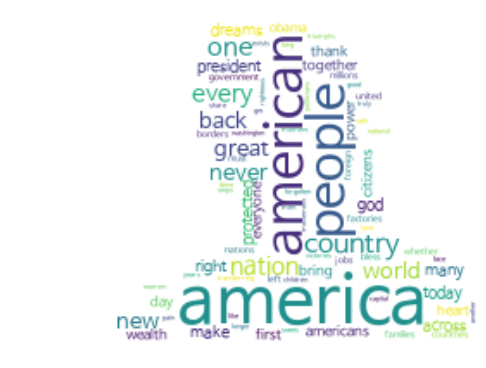

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(wc_trump, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
from wordcloud import ImageColorGenerator  # 이미지로부터 칼라 생성
image_colors = ImageColorGenerator(trump_mask)

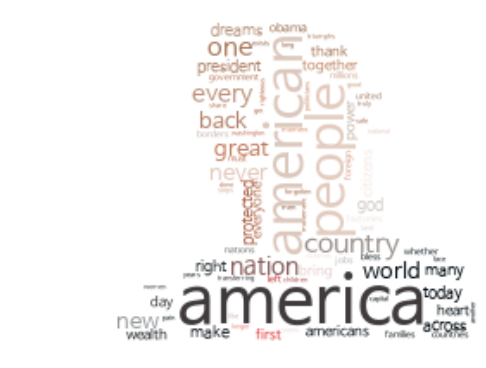

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(wc_trump.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")
plt.show()

#### ※ 문재인 대통령 형상 WordCloud

In [46]:
moon_mask = np.array(Image.open("D:\\취임연설문\\문재인 대통령.PNG"))

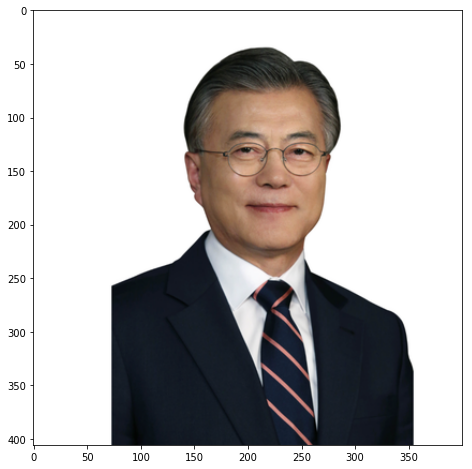

In [47]:
plt.figure(figsize=(8,8))
plt.imshow(moon_mask, interpolation = "bilinear")
plt.show()

In [48]:
count = Counter(word_list)

wc_moon = WordCloud(
font_path = font_path,
mask = moon_mask,
background_color = "white"
)

wc_moon = wc_moon.generate_from_frequencies(count)

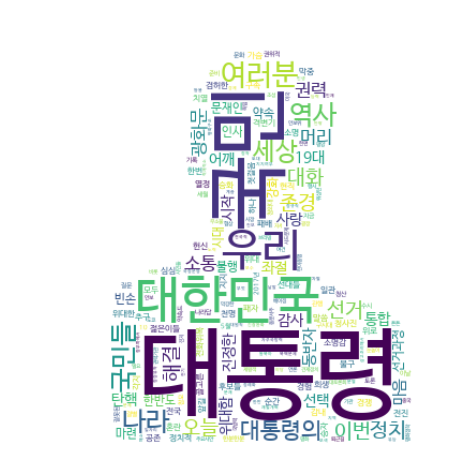

In [49]:
plt.figure(figsize=(8,8))
plt.imshow(wc_moon, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [50]:
image_colors = ImageColorGenerator(moon_mask)

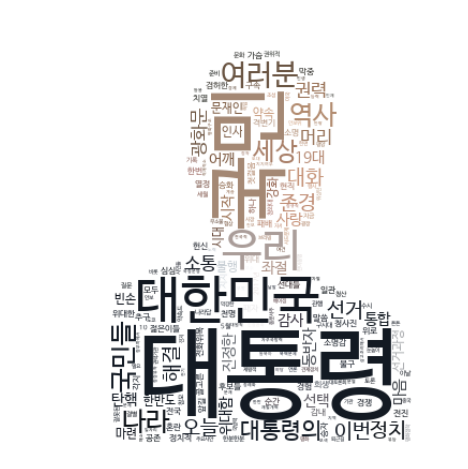

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(wc_moon.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")
plt.show()